In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# 1. Анализ данных

## Считываем тренировочную и тестовую выборки:

In [90]:
df_train = pd.read_csv('train.csv', parse_dates=['Date'], index_col='Date')
df_test = pd.read_csv('test.csv', parse_dates=['Date'], index_col='Date')

df_train.describe()

,store,product,number_sold
count,230090.000000,230090.000000,230090.000000
mean,3.000000,4.500000,780.926107
std,2.000004,2.872288,204.096737
min,0.000000,0.000000,238.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,835.000000
75%,5.000000,7.000000,914.000000
max,6.000000,9.000000,1205.000000


In [91]:
df_train.dtypes

store          int64
product        int64
number_sold    int64
dtype: object

In [92]:
x_train = df_train[['store', 'product']]
x_test = df_test[['store', 'product']]
y_train = df_train['number_sold']
y_test = df_train['number_sold']

## Суммарные продажи:

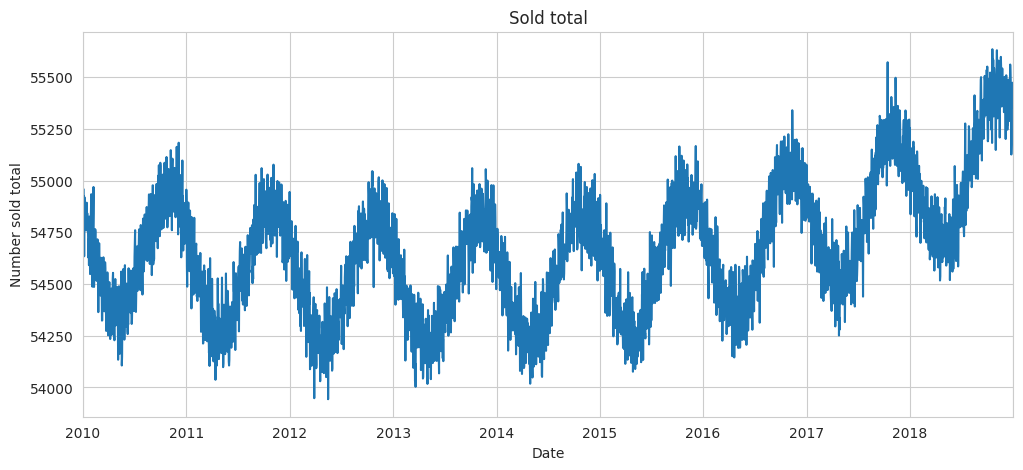

In [93]:
df = df_train.groupby('Date')['number_sold'].sum()
ax = df.plot(figsize = (12, 5), legend = None)
ax.set(title = 'Sold total', xlabel = 'Date', ylabel = 'Number sold total');

## Суммарные продажи по неделям:

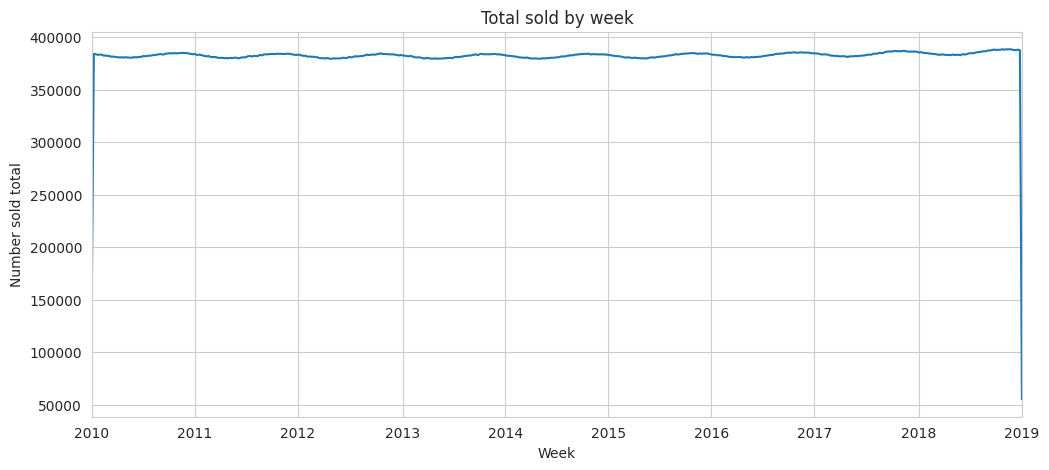

In [94]:
df = df_train.resample('W')['number_sold'].sum()
ax = df.plot(figsize = (12, 5), legend = None)
ax.set(title = 'Total sold by week', xlabel = 'Week', ylabel = 'Number sold total');

## Cуммарные продажи по месяцам

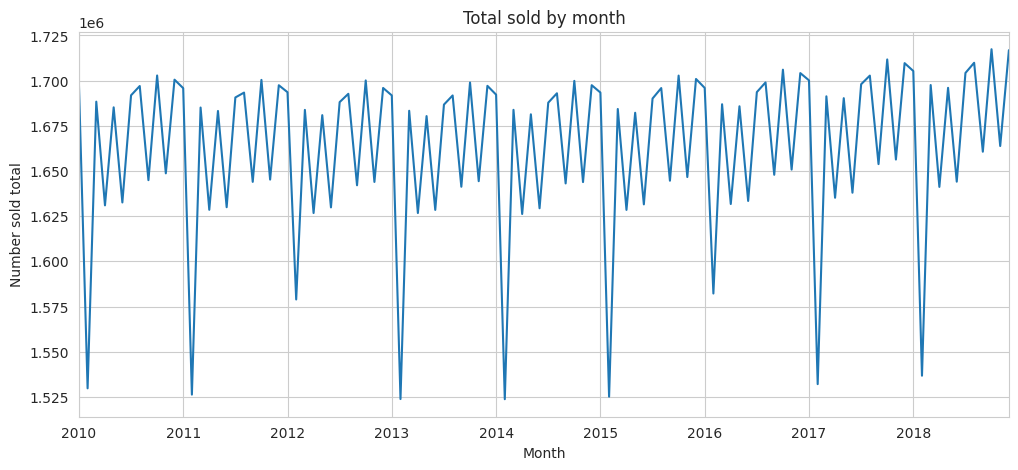

In [95]:
df = df_train.resample('ME')['number_sold'].sum()
ax = df.plot(figsize = (12, 5), legend = None)
ax.set(title = 'Total sold by month', xlabel = 'Month', ylabel = 'Number sold total');

## Суммарные продажи по годам:

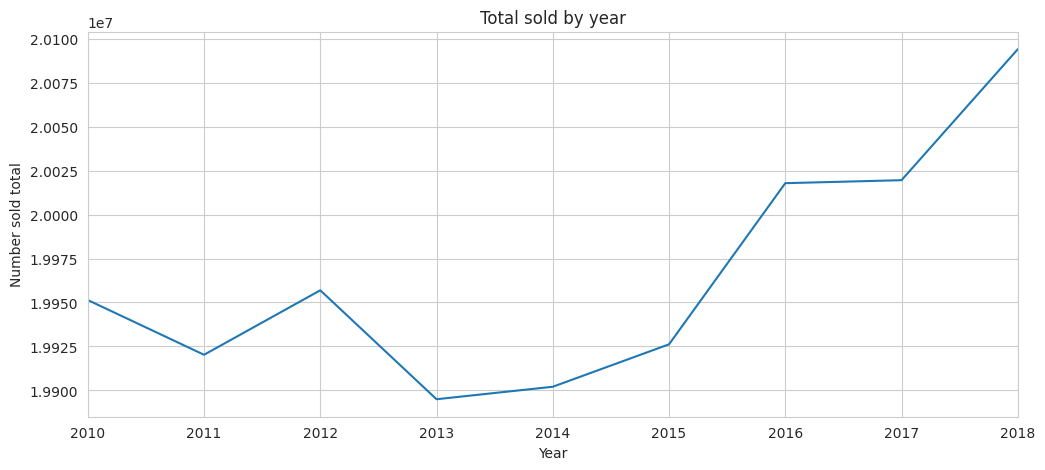

In [96]:
df = df_train.resample('YE')['number_sold'].sum()
ax = df.plot(figsize = (12, 5), legend = None)
ax.set(title = 'Total sold by year', xlabel = 'Year', ylabel = 'Number sold total');

## Статистика общих продаж по магазинам:

In [97]:
df_train.groupby('store')['number_sold'].agg(['mean', 'std', 'count'])

,mean,std,count
store,,,
0,847.521387,97.930219,32870
1,719.662063,52.944443,32870
2,816.817706,74.094563,32870
3,344.289960,38.900967,32870
4,974.185580,68.020418,32870
5,890.331153,79.824163,32870
6,873.674901,56.072458,32870


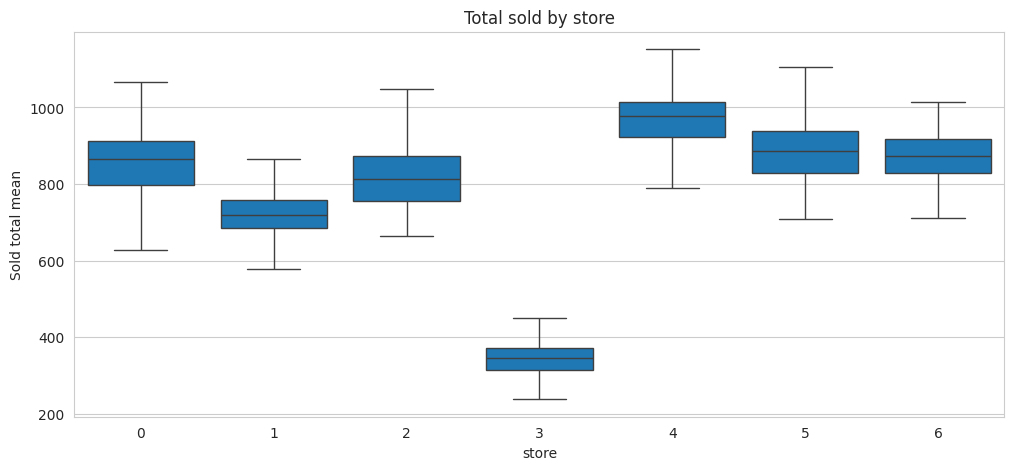

In [98]:
plt.figure(figsize=(12,5))
sns.boxplot(x='store', y='number_sold', data=df_train, showfliers=False, saturation=1)
plt.ylabel('Sold total mean')
plt.title('Total sold by store')
plt.show()


## Статистика общих продаж товаров:

In [99]:
df_train.groupby('product')['number_sold'].agg(['mean', 'std', 'count'])

,mean,std,count
product,,,
0,726.364379,192.380245,23009
1,803.954279,195.151783,23009
2,777.170933,208.626311,23009
3,739.058325,191.214791,23009
4,819.852406,198.277480,23009
5,802.362728,201.554683,23009
6,803.462645,208.445670,23009
7,832.073232,213.099447,23009
8,720.787866,205.991053,23009


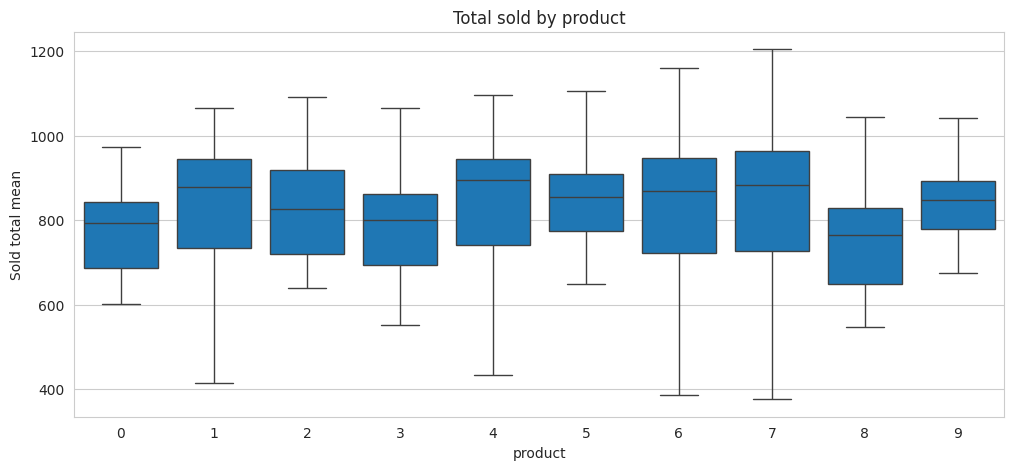

In [100]:
plt.figure(figsize=(12,5))
sns.boxplot(x='product', y='number_sold', data=df_train, showfliers=False, saturation=1)
plt.ylabel('Sold total mean')
plt.title('Total sold by product')
plt.show()

## Продажи товаров по магазинам

In [101]:
df = df_train.groupby(['store', 'product']).resample('ME')['number_sold'].sum()
df = df.reset_index()
df.head()

,store,product,Date,number_sold
0,0,0,2010-01-31,25522
1,0,0,2010-02-28,23684
2,0,0,2010-03-31,26803
3,0,0,2010-04-30,25893
4,0,0,2010-05-31,26376


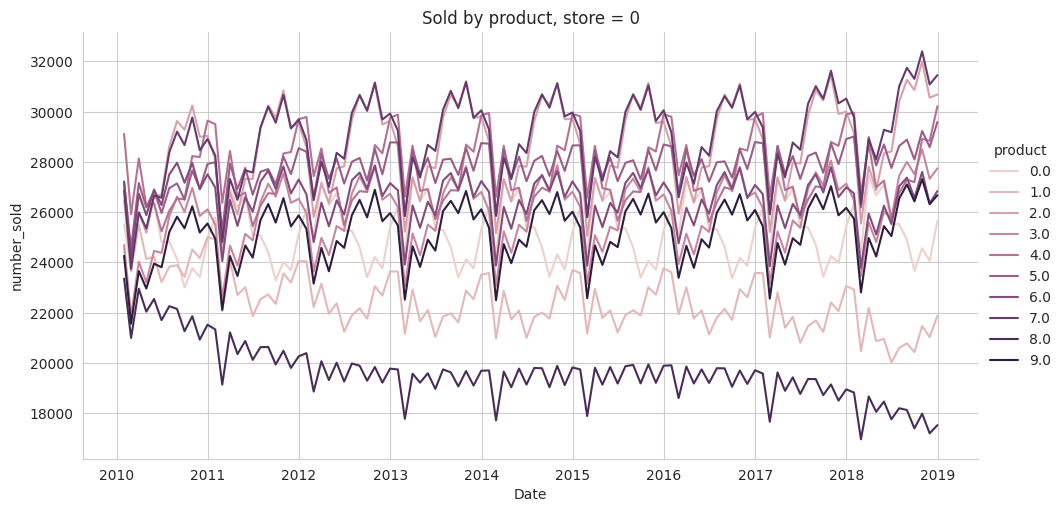

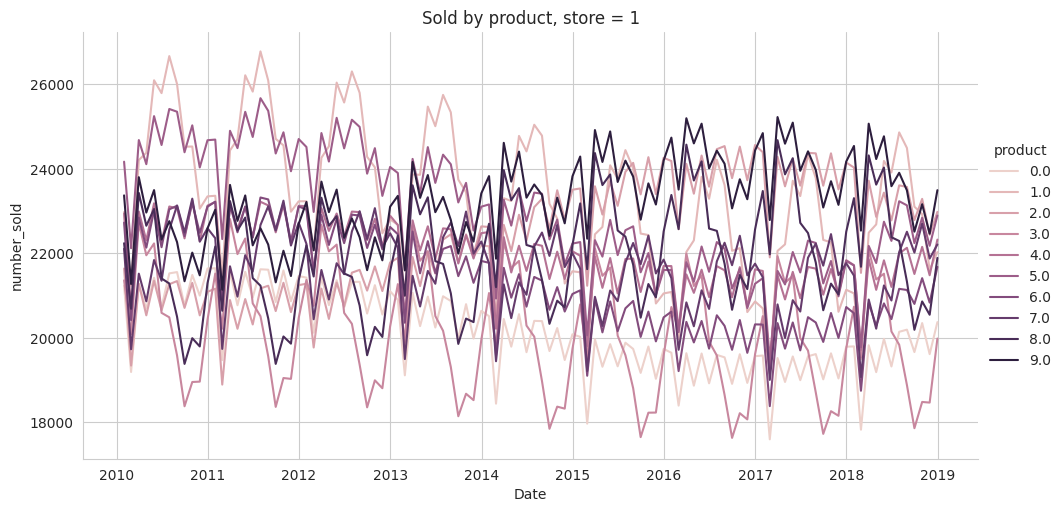

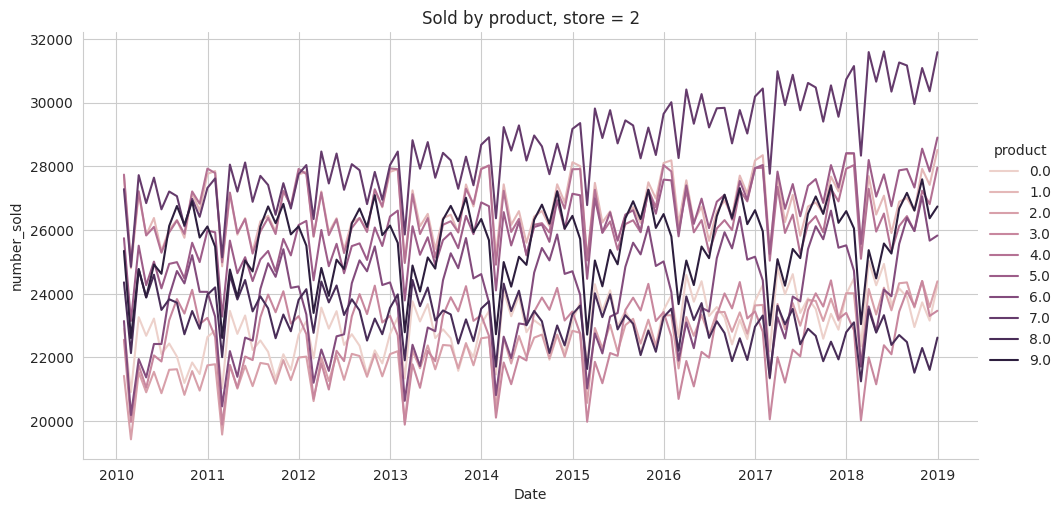

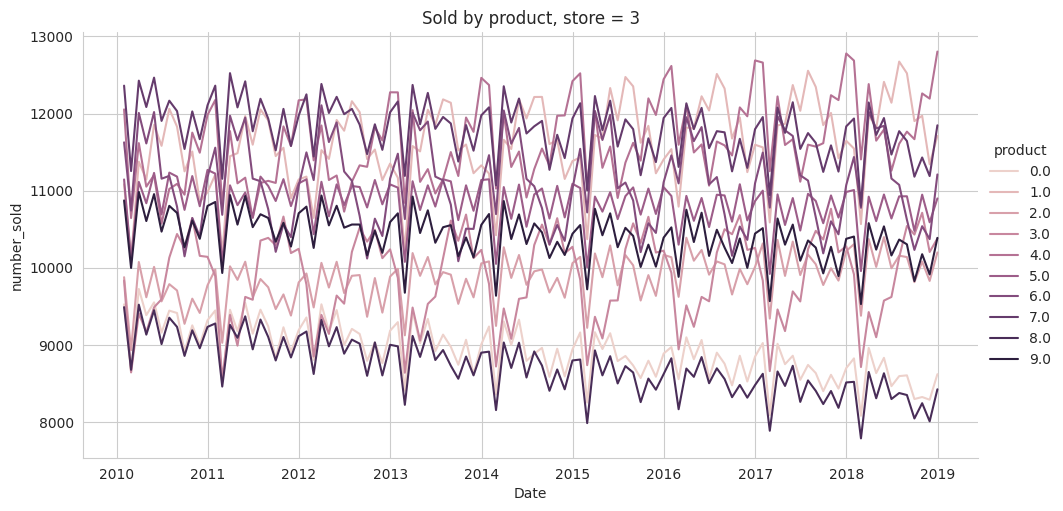

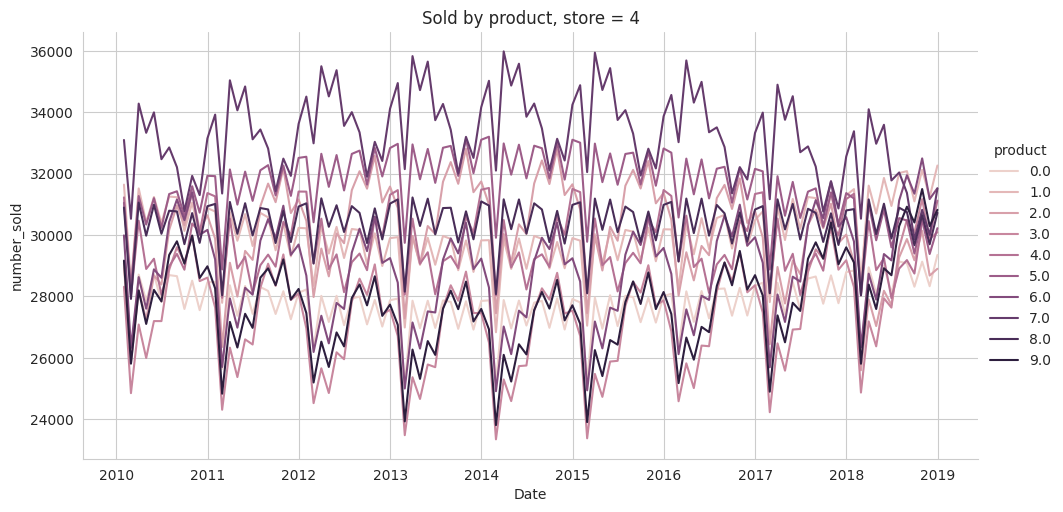

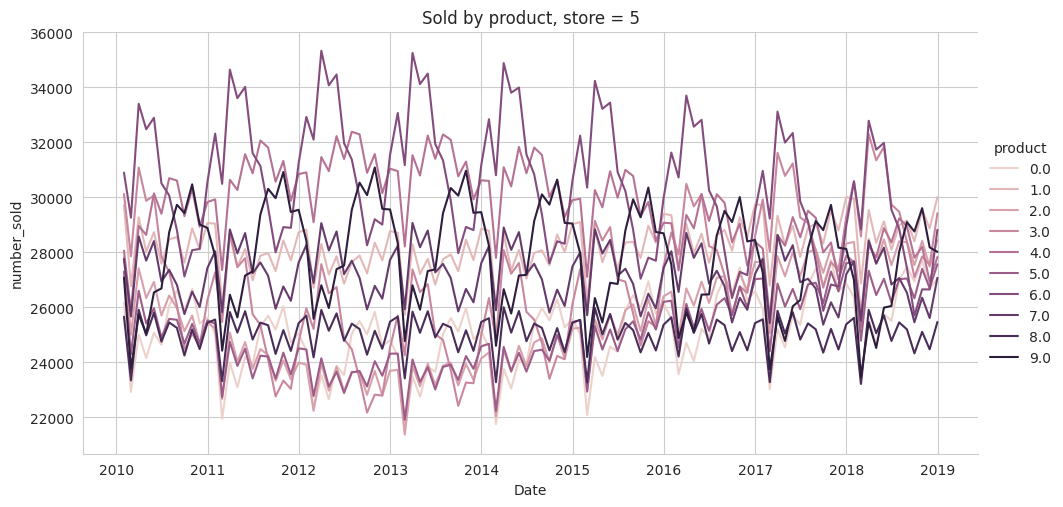

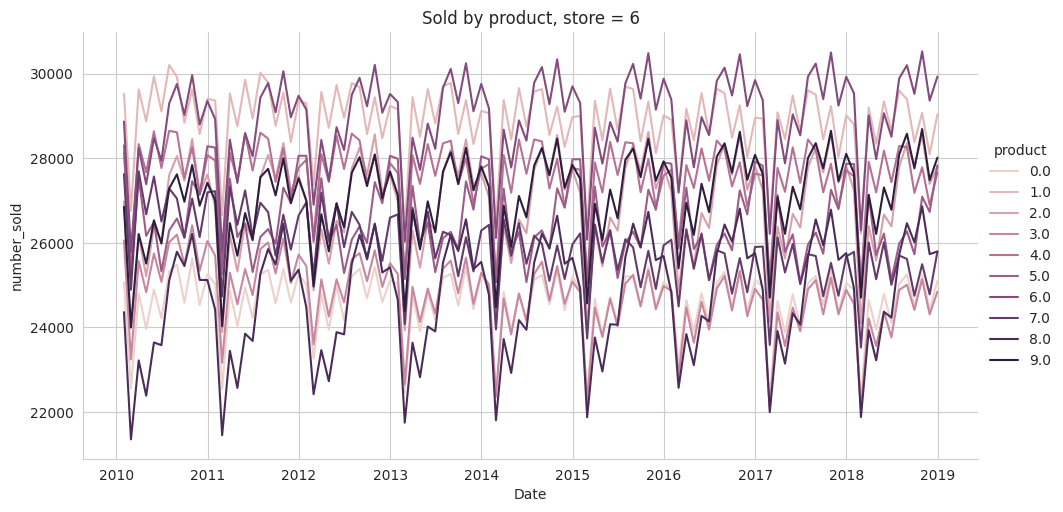

In [102]:
for item in df['store'].unique():
    sns.relplot(data=df[df['store'] == item], x=df['Date'], y=df['number_sold'], kind='line', hue='product', aspect=2, legend='full')
    plt.title(f'Sold by product, store = {item}')
    plt.show()

# 2. Обработка данных

## Аддитивная декомпозиция

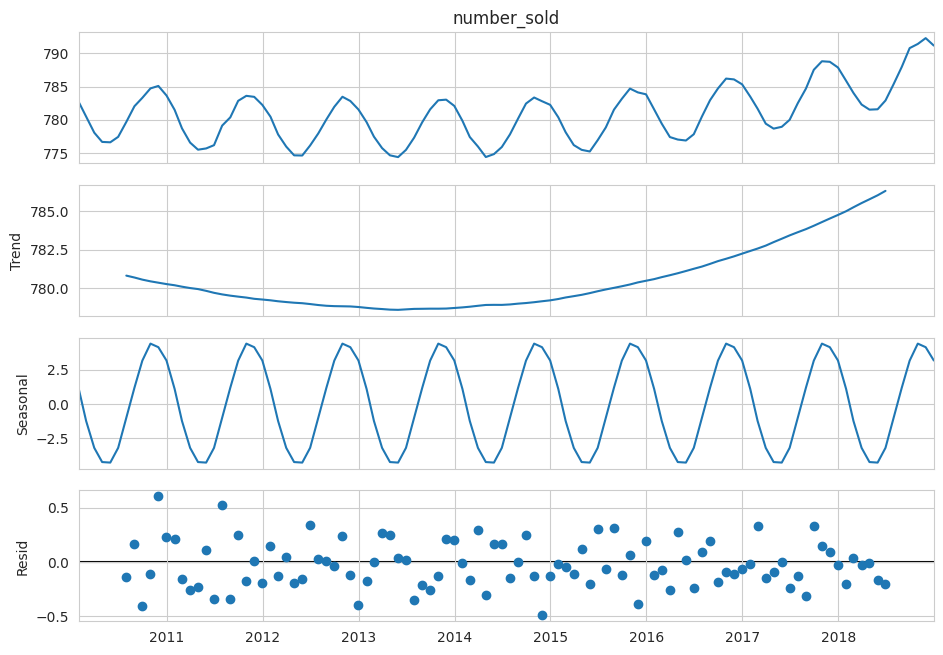

In [103]:
df = df_train.resample('ME')['number_sold'].mean()
decompose = seasonal_decompose(df, model='additive', period=12)
fig = decompose.plot()
fig.set_size_inches((10, 7))
plt.show()

## Мультипликативная декомпозиция

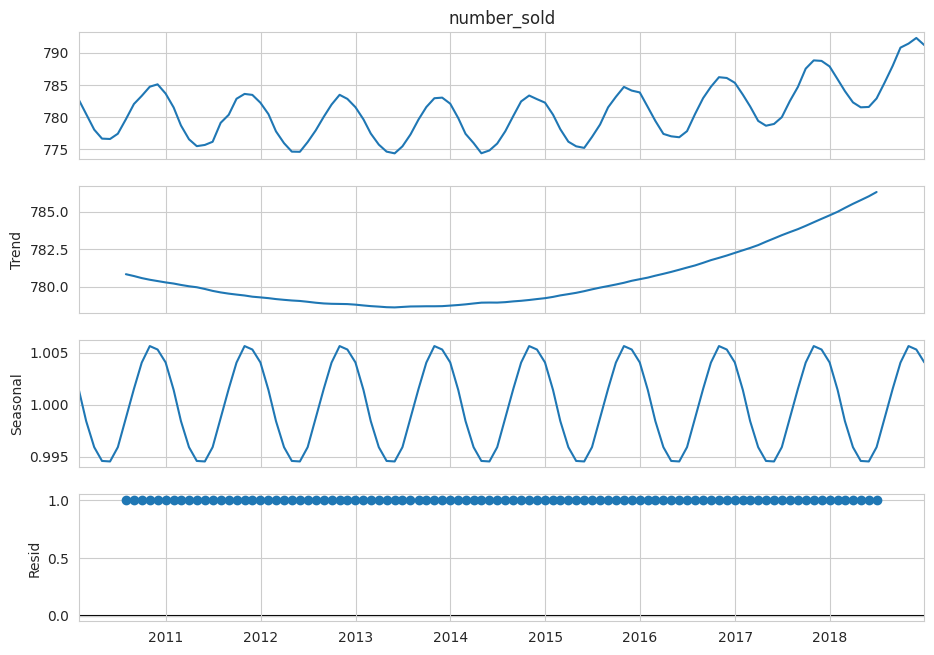

In [104]:
df = df_train.resample('ME')['number_sold'].mean()
decompose = seasonal_decompose(df, model='multiplicative', period=12)
fig = decompose.plot()
fig.set_size_inches((10, 7))
plt.show()

Для мультиплиткативной декомпозиции видно, что остаток постоянен, сезонная составляющая меняется по некоторому закону (синусоида), в данных прослеживается тренд.

## Автокорреляция

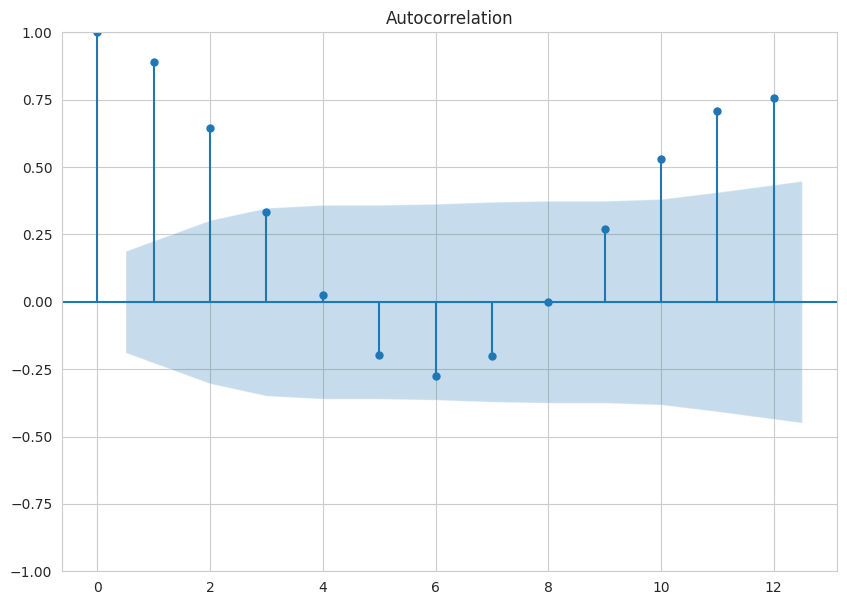

In [105]:
fig = plot_acf(df, lags=12, ax=plt.gca())
fig.set_size_inches((10, 7))
plt.show()

## Частичная автокорреляция

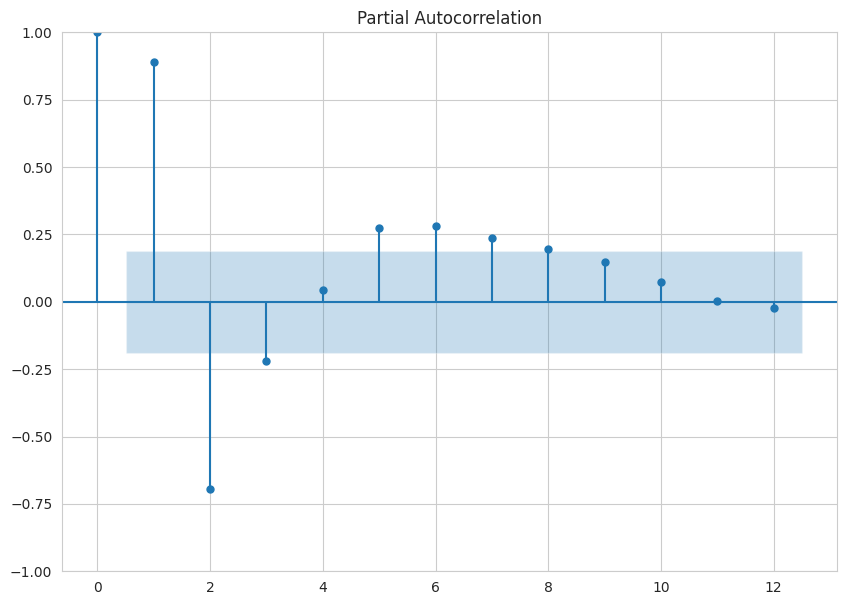

In [106]:
fig = plot_pacf(df, lags=12)
fig.set_size_inches((10, 7))
plt.show()

Для автокорреляции и частичной автокорреляции имеют место лаги, существенно отличные от нуля.

## Проверка ряда на стационарность

Тест Дики-Фуллера до дифференцирования



In [107]:
result = adfuller(df)

print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')
print(f'Critical Values: {result[4]}')

ADF Statistic: 1.3365
p-value: 0.9968
Critical Values: {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}



Тест Дики-Фуллера после дифференцирования


In [108]:
result = adfuller(df.diff().dropna())

print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')
print(f'Critical Values: {result[4]}')

ADF Statistic: -0.1833
p-value: 0.9405
Critical Values: {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}


p-value > 0.05, ряд не стационарен.


# 3. Оценка качества модели с помощью анализа остатков модели

Строим модель SARIMA:

In [109]:
y_train = df_train['number_sold'].resample('D').mean();
y_test = df_test['number_sold'].resample('D').mean();

In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False)
model = model.fit(disp=False)

In [111]:
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       number_sold   No. Observations:                 3287
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5463.592
Date:                           Wed, 23 Apr 2025   AIC                          10937.183
Time:                                   03:02:38   BIC                          10967.646
Sample:                               01-01-2010   HQIC                         10948.093
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0226      0.022     -1.016      0.310      -0.066       0.021
ma.L1         -0.8016      0.013    -60.213

In [112]:
y_pred = model.get_forecast(steps=len(y_test))
y_pred = y_pred.predicted_mean

## Остатки:

In [113]:
residuals = y_test - y_pred

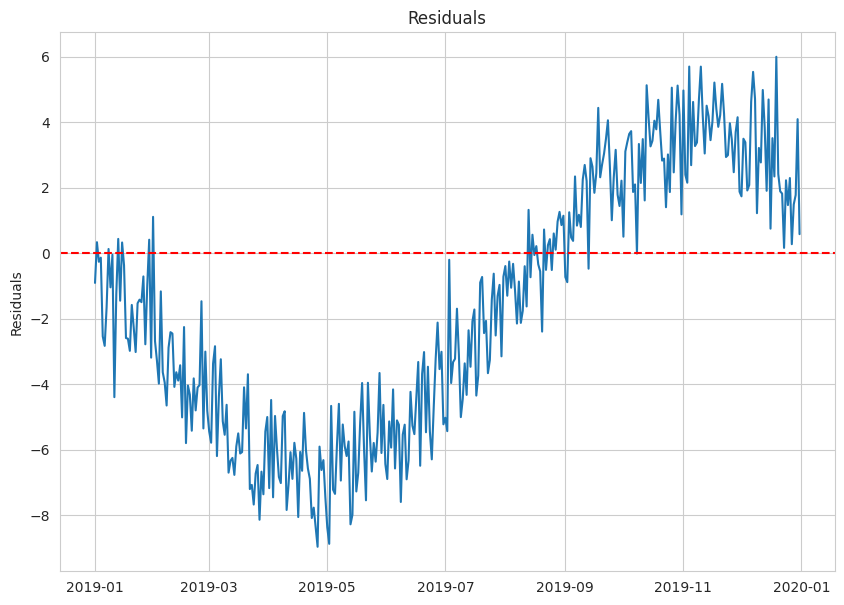

In [114]:
plt.figure(figsize=(10, 7))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.ylabel('Residuals');

## Гистограмма остатков

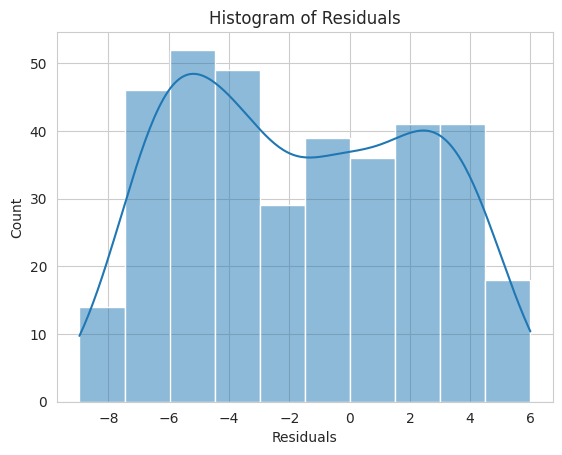

In [115]:
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals');

## Q-Q plot для проверки нормальности

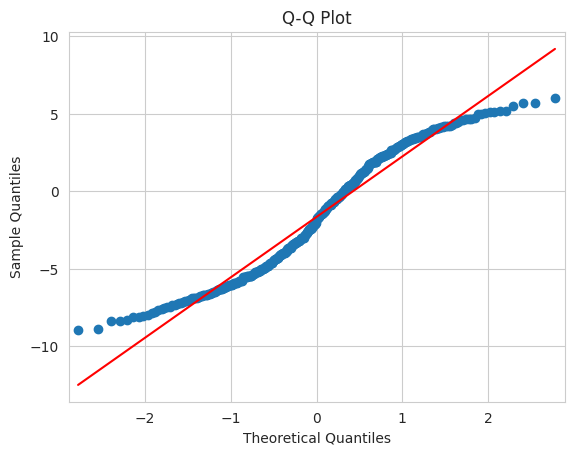

In [116]:
import statsmodels.api as sm

sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot');

## ACF Plot для проверки автокорреляции остатков

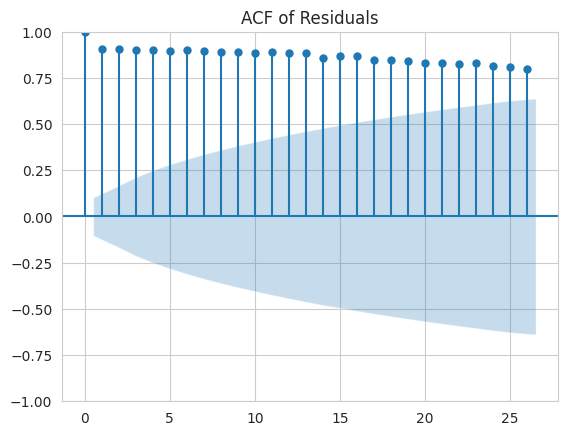

In [117]:
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals');

# 4. Оценка качества предсказаний с помощью метрик mape, rmse, r2

In [118]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [119]:
print("\nМетрики качества:")
print(f"MAPE: {mape:.4%}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")



Метрики качества:
MAPE: 0.4623%
RMSE: 4.2349
R2: 0.0597
